In [1]:
import numpy as np
import cv2
import skimage
import matplotlib.pyplot as plt
import os
from matplotlib.image import imread

In [68]:
img = cv2.imread(r'C:\Users\Rohit\Desktop\Uwaterloo 2.0\Snipped images\3.png')
img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [69]:
#large view function
def large_view(image):
    plt.figure(figsize=(9,9))
    plt.imshow(image,cmap='gray')

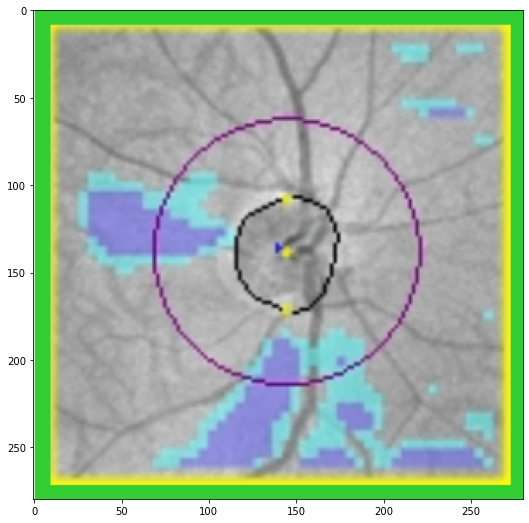

In [70]:
large_view(img)

In [74]:
img.shape

(280, 280, 3)

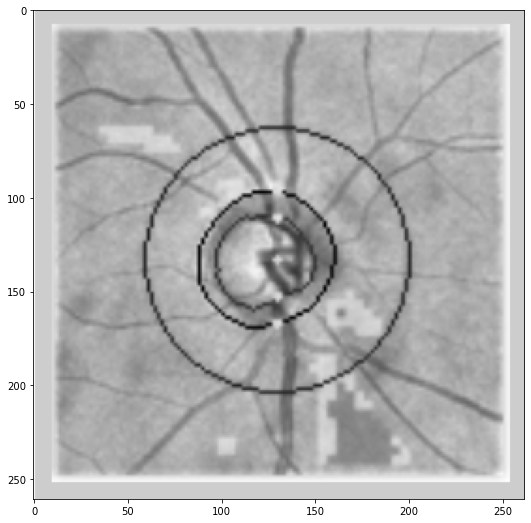

In [6]:
large_view(img[:,:,1])

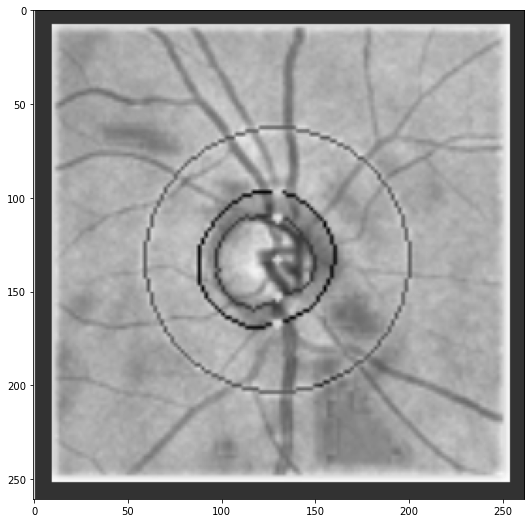

In [7]:
large_view(img[:,:,0])

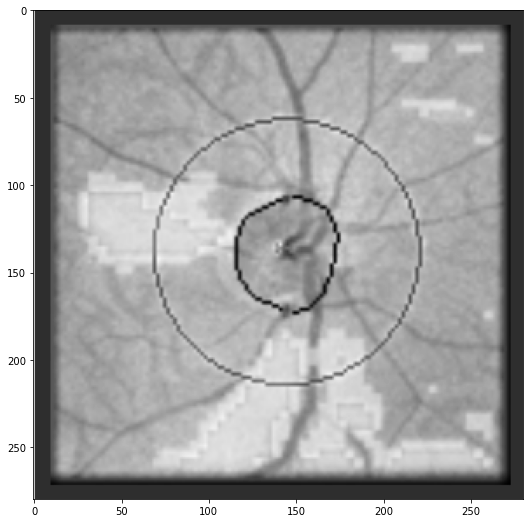

In [80]:
large_view(img[:,:,2])

In [9]:
img[:,:,2].min()

0

In [10]:
# clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
# img_clahe = clahe.apply(img[:,:,0])
# large_view(img_clahe)

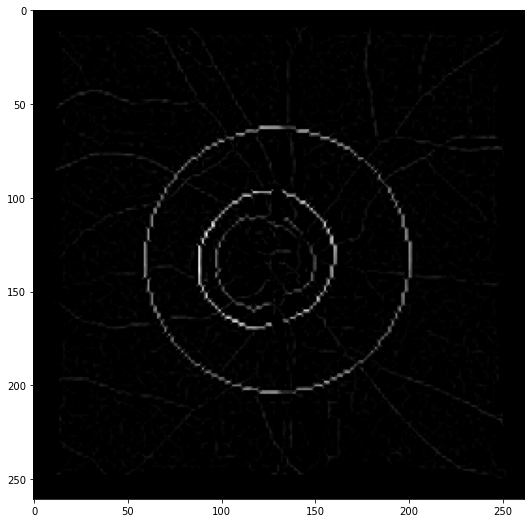

In [11]:
from skimage.morphology import disk,square,diamond
kernel = disk(1)
BH_Image = cv2.morphologyEx(img[:,:,0], cv2.MORPH_BLACKHAT,kernel)
large_view(BH_Image)

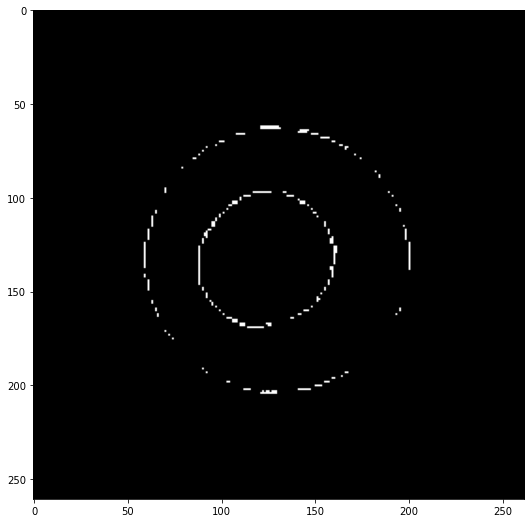

In [12]:
ret,th = cv2.threshold(BH_Image,55,255,cv2.THRESH_BINARY)
large_view(th)

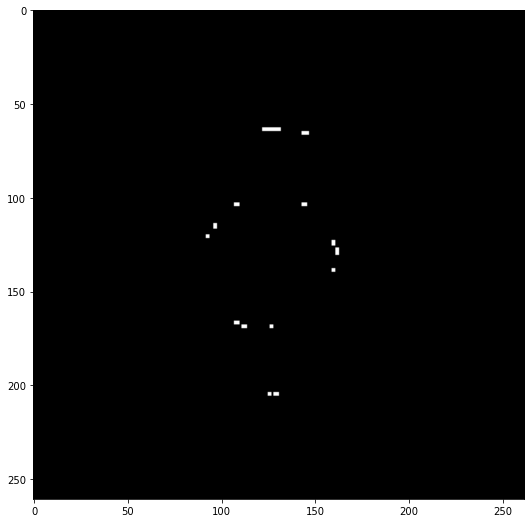

In [13]:
kernel_1 = square(2)
th_open = cv2.morphologyEx(th, cv2.MORPH_OPEN,kernel_1)
large_view(th_open)

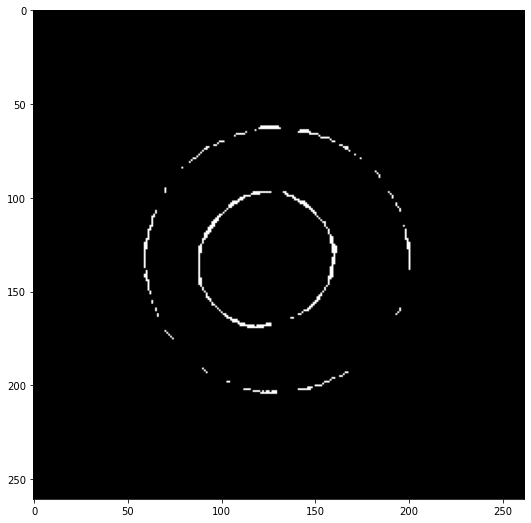

In [14]:
kernel = disk(13)
th_close = cv2.morphologyEx(th, cv2.MORPH_CLOSE,kernel)
large_view(th_close)

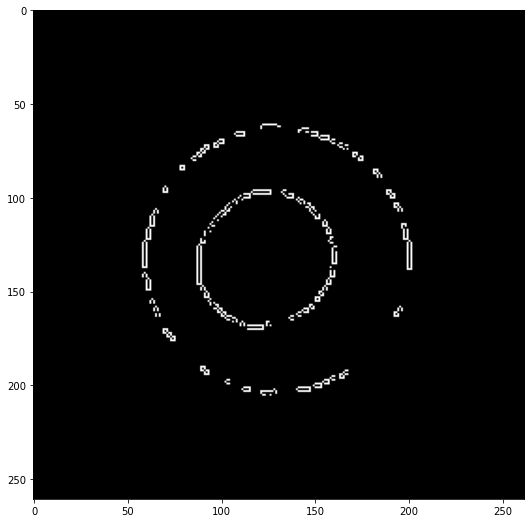

In [15]:
#cv2.fitellipse method using canny
edge = cv2.Canny(th,10,150)
large_view(edge)

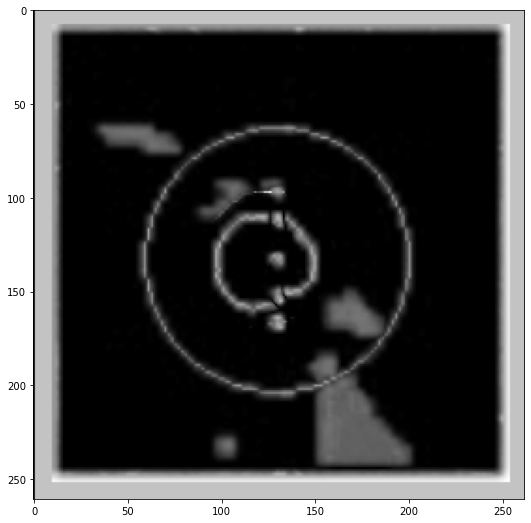

In [16]:
#Tryout various color mappings
img_HSV = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
large_view(img_HSV[:,:,1])

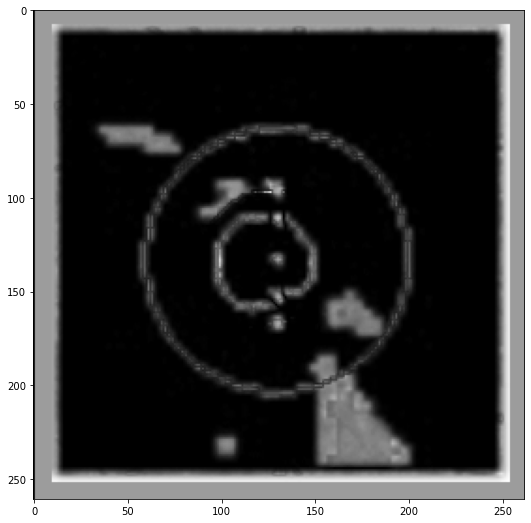

In [17]:
img_HLS = cv2.cvtColor(img,cv2.COLOR_BGR2HLS)
large_view(img_HLS[:,:,2])

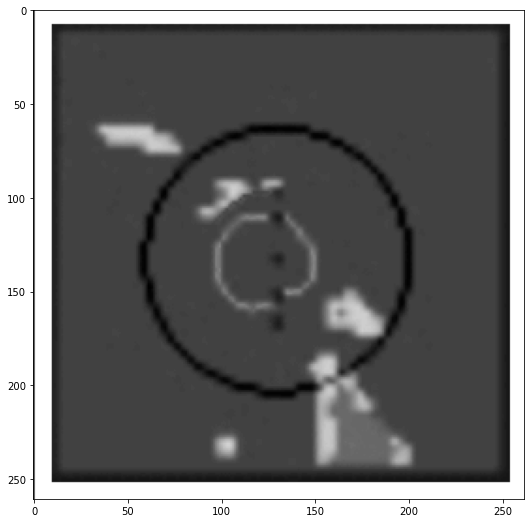

In [18]:
img_LAB = cv2.cvtColor(img,cv2.COLOR_BGR2LAB)
large_view(img_LAB[:,:,2])

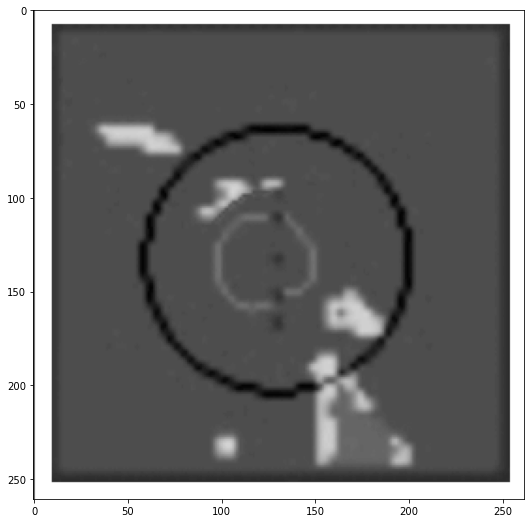

In [19]:
img_LUV = cv2.cvtColor(img,cv2.COLOR_BGR2LUV)
large_view(img_LUV[:,:,2])

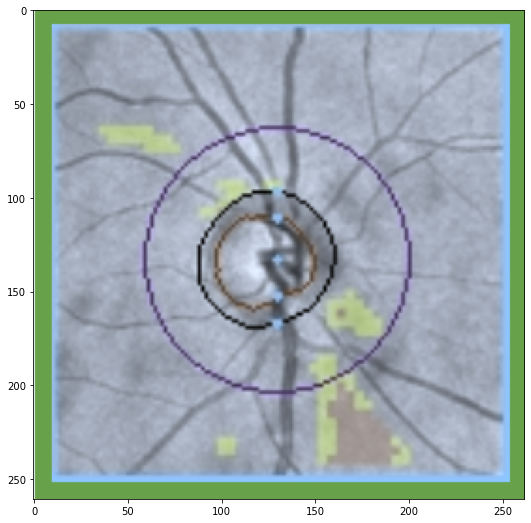

In [20]:
img_XYZ = cv2.cvtColor(img,cv2.COLOR_BGR2XYZ)
large_view(img_XYZ)

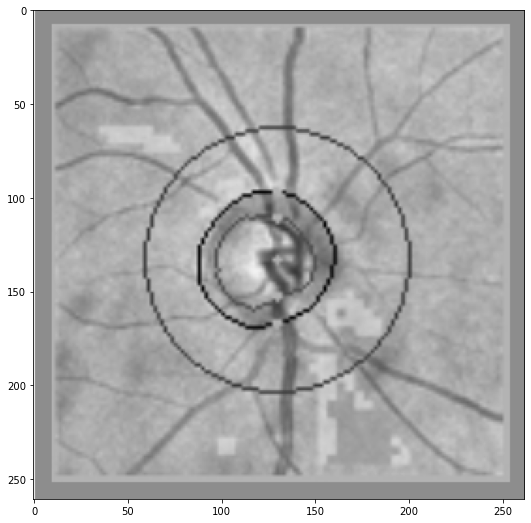

In [21]:
img_YUV = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
large_view(img_YUV[:,:,0])

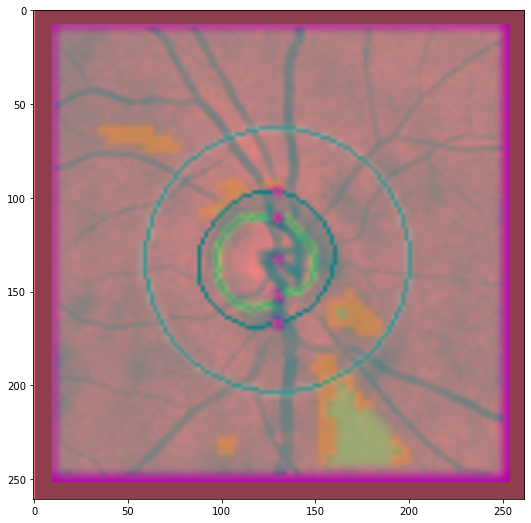

In [22]:
img_YCrCb = cv2.cvtColor(img,cv2.COLOR_BGR2YCrCb)
large_view(img_YCrCb)

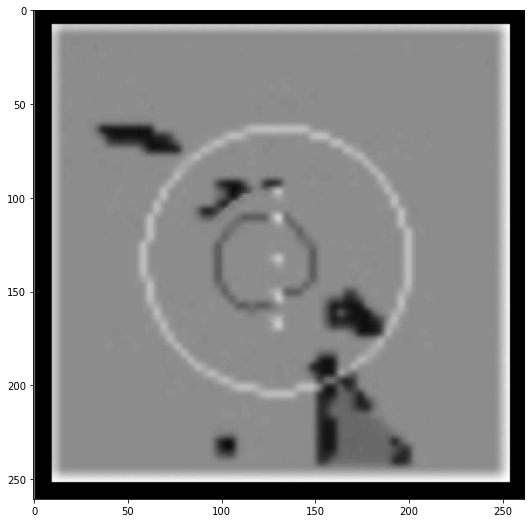

In [23]:
img_YCrCB = cv2.cvtColor(img,cv2.COLOR_BGR2YCR_CB)
large_view(img_YCrCB[:,:,2])

In [24]:
#No color mapping works

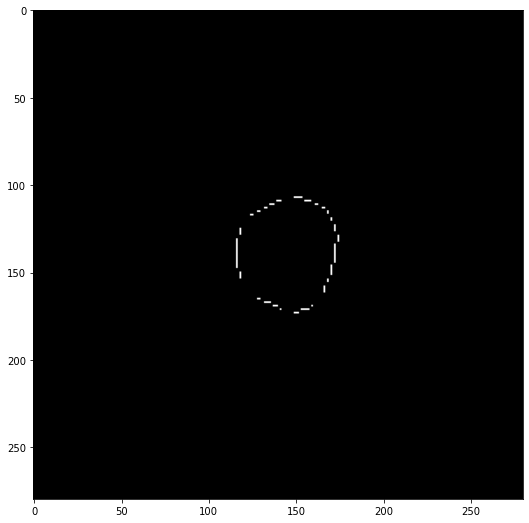

In [77]:
#next idea : extract only Optic Disc using pixel wise method
def binarize(image_to_transform, threshold):
    # now, lets convert that image to a single greyscale image using convert()
    # the threshold value is usually provided as a number between 0 and 255, which
    # is the number of bits in a byte.
    # the algorithm for the binarization is pretty simple, go through every pixel in the
    # image and, if it's greater than the threshold, turn it all the way up (255), and
    # if it's lower than the threshold, turn it all the way down (0).
    # so lets write this in code. First, we need to iterate over all of the pixels in the
    # image we want to work with
    new_img = np.zeros(image_to_transform.shape)
    for x in range(image_to_transform.shape[0]):
        for y in range(image_to_transform.shape[1]):
            # for the given pixel at w,h, lets check its value against the threshold
            if image_to_transform[x,y]< threshold: #note that the first parameter is actually a tuple object
                # lets set this to zero
                new_img[x,y] = 255
            else:
                # otherwise lets set this to 255
                new_img[x,y] = 0
    #now we just return the new image
    return new_img
 
op_img = binarize(img_RGB[:,:,2],35)
large_view(op_img)

((144.7476348876953, 139.1373748779297), (56.94942855834961, 65.4596939086914), 13.361638069152832)


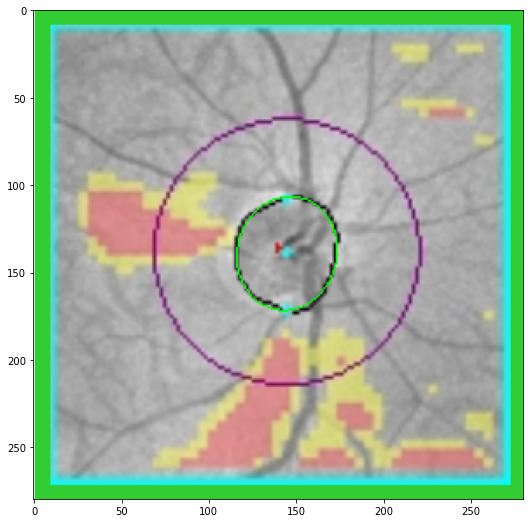

In [79]:
y,x=np.nonzero(op_img)
edge_list = np.array([[_x,_y] for _x,_y in zip(x,y)])
_ellipse = cv2.fitEllipse(edge_list)
print(_ellipse)
edge_clone=op_img.copy()
img_RGB_ROI = img_RGB
ellipse1 = cv2.ellipse(edge_clone, _ellipse, (0,255,0),1) 
ellipse2 = cv2.ellipse(img_RGB_ROI.copy(), _ellipse, (0,255,0),1)
large_view(ellipse2)

In [78]:
print(_ellipse)

((144.66424560546875, 138.95570373535156), (56.79594039916992, 65.31787872314453), 16.41035270690918)
